# SAE2 :  Les vélos de Nantes

In [18]:
# importation des packages
import numpy as np
import pandas as pd
import seaborn as sns
import ast as ast
from geopy.distance import geodesic
# importation des modules
import scipy.stats as sps


import networkx as nx


import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

## Le but de ce fichier est d'illustrer des contructions de graphes networkx à partir de données géolocalisée csv

### 1 Traitement des données csv :

In [19]:
# importation du fichier csv comme un panda dataframe
capteurs=pd.read_csv("data_geolocalisationCompteur_uniques.csv", sep=';')

#on affiche les premières lignes du fichier
capteurs.head()

,Numeros,Libelle,Geolocalisation
0,"788,786,787,785",50 Otages,"47.219956631104175, -1.555035376121632"
1,"950,949",avenue de la Lib?ration,"47.19261758551086, -1.5468218693151887"
2,679,Bd Malakoff vers Gare Sud,"47.21316284797035, -1.5359421578632508"
3,"665,664",Bonduelle,"47.21160939094489, -1.5432599939033043"
4,"744,745",Calvaire,"47.215489324621586, -1.5606018691288568"


In [20]:
# adaptation du format des données de géolocalisation
ast.literal_eval(capteurs['Geolocalisation'][0])

(47.219956631104175, -1.555035376121632)

In [21]:
# création de la colone Latitude
capteurs['Latitude']=capteurs['Geolocalisation'].apply(lambda x : ast.literal_eval(x)[0])

In [22]:
# création de la colone Longitude
capteurs['Longitude']=capteurs['Geolocalisation'].apply(lambda x : ast.literal_eval(x)[1])

In [23]:
#on affiche les premières lignes du fichier actualisé
capteurs.head()

,Numeros,Libelle,Geolocalisation,Latitude,Longitude
0,"788,786,787,785",50 Otages,"47.219956631104175, -1.555035376121632",47.219957,-1.555035
1,"950,949",avenue de la Lib?ration,"47.19261758551086, -1.5468218693151887",47.192618,-1.546822
2,679,Bd Malakoff vers Gare Sud,"47.21316284797035, -1.5359421578632508",47.213163,-1.535942
3,"665,664",Bonduelle,"47.21160939094489, -1.5432599939033043",47.211609,-1.543260
4,"744,745",Calvaire,"47.215489324621586, -1.5606018691288568",47.215489,-1.560602


In [24]:
# Création de dataframe/dictionary plus lisibles
capteurs_lite= capteurs[['Numeros','Latitude','Longitude']].copy()


# Création d'un dictionaire, structure proche des graphes networkx
#capteurs_dict=capteurs_lite[['Numéro','Latitude','Longitude']].to_dict()

capteurs_dict = {x : [capteurs_lite.iloc[x,0],capteurs_lite.iloc[x,1], capteurs_lite.iloc[x,2]] for x in range(len(capteurs_lite['Numeros']))}
capteurs_dict

{0: ['788,786,787,785', 47.219956631104175, -1.555035376121632],
 1: ['950,949', 47.19261758551086, -1.5468218693151887],
 2: ['679', 47.21316284797035, -1.5359421578632508],
 3: ['665,664', 47.21160939094489, -1.5432599939033043],
 4: ['744,745', 47.215489324621586, -1.5606018691288568],
 5: ['994,995', 47.2211808996175, -1.5520557476514105],
 6: ['747,746', 47.235601216475615, -1.5495223616419478],
 7: ['699,89', 47.20495618318359, -1.767425435319685],
 8: ['669,668', 47.20359482806785, -1.5366316681743837],
 9: ['667,847', 47.207184415056695, -1.548628245726742],
 10: ['1041,1042', 47.252189065198046, -1.5532727474949712],
 11: ['880,881', 47.211547513955786, -1.5527808502938574],
 12: ['944,946,943,945', 47.21038195207655, -1.5439240750859649],
 13: ['742,743', 47.21165736518504, -1.5563430663233755],
 14: ['683,682', 47.20889069766999, -1.5663860901495563],
 15: ['666', 47.2083580489973, -1.5497189172153978],
 16: ['890,670', 47.19812739474562, -1.5422919798047263],
 17: ['672,673

In [25]:
capteurs_lite.head()

,Numeros,Latitude,Longitude
0,"788,786,787,785",47.219957,-1.555035
1,"950,949",47.192618,-1.546822
2,679,47.213163,-1.535942
3,"665,664",47.211609,-1.543260
4,"744,745",47.215489,-1.560602


### 2 Création d'un graphe en format networkx

In [26]:
# Ajout des sommets

G = nx.Graph(name = "Vélo_Nantes")
for index, row in capteurs_lite.iterrows():
    G.add_node(index,numeros=[int(x) for x in row[0].split(',')],lat=row[1],long=row[2])

G.nodes[0]


{'numeros': [788, 786, 787, 785],
 'lat': 47.219956631104175,
 'long': -1.555035376121632}

In [27]:
# proposition de dictionaire de position pour le tracé en networkx

def pos_graph(v):
    x=float(v[1])
    y=float(v[2])
    
    #on peut adapter les coordonnées
    x=(x-47.20)*1000
    y=(y+1.543)*1000
    
    return np.array([x,y])

capteurs_pos = dict((k, pos_graph(v)) for k, v in capteurs_dict.items())

capteurs_pos

{0: array([ 19.9566311 , -12.03537612]),
 1: array([-7.38241449, -3.82186932]),
 2: array([13.16284797,  7.05784214]),
 3: array([11.60939094, -0.2599939 ]),
 4: array([ 15.48932462, -17.60186913]),
 5: array([21.18089962, -9.05574765]),
 6: array([35.60121648, -6.52236164]),
 7: array([   4.95618318, -224.42543532]),
 8: array([3.59482807, 6.36833183]),
 9: array([ 7.18441506, -5.62824573]),
 10: array([ 52.1890652 , -10.27274749]),
 11: array([11.54751396, -9.78085029]),
 12: array([10.38195208, -0.92407509]),
 13: array([ 11.65736519, -13.34306632]),
 14: array([  8.89069767, -23.38609015]),
 15: array([ 8.358049  , -6.71891722]),
 16: array([-1.87260525,  0.7080202 ]),
 17: array([ 1.37134043, -5.91242273]),
 18: array([  9.07608647, -12.38944411]),
 19: array([13.45667065, 13.66826573]),
 20: array([12.66213416,  6.49660318]),
 21: array([28.70715868, 61.4208826 ]),
 22: array([-39.70646872,   0.90764685]),
 23: array([ -51.80699499, -150.90944549]),
 24: array([18.90748612,  5.95

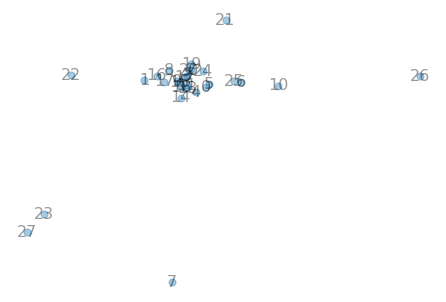

In [28]:
nx.draw(G,pos=capteurs_pos,node_size=50, alpha=0.4, edge_color="r", font_size=16, with_labels=True)

#### 2.1 Ajout des arêtes 


In [29]:
##On ajoute les arêtes au graphe

##Pour l'exemple, on a choisi de relier deux sommets s'ils sont proches
##(distance < 1km) et au minimum à ses trois voisins les plus proches

#La pertinence de ce choix est clairement à discuter

for s in G.nodes:
    d=0
    dist_dic={}
    print(G.nodes[s])
    for t in G.nodes:
        dist=geodesic((G.nodes[s]['lat'],G.nodes[s]['long']),(G.nodes[t]['lat'],G.nodes[t]['long'])).km
        dist_dic[t]=dist
        if  dist<1 and s!=t :
            G.add_edge(s,t,distance=dist)
            d=d+1
    if d<3:
        dist_sort=sorted(dist_dic.items(), key=lambda item: item[1])
        for i in range(4):
            G.add_edge(s,dist_sort[i+1][0],distance=dist_sort[i+1][0])
 

{'numeros': [788, 786, 787, 785], 'lat': 47.219956631104175, 'long': -1.555035376121632}
{'numeros': [950, 949], 'lat': 47.19261758551086, 'long': -1.5468218693151887}
{'numeros': [679], 'lat': 47.21316284797035, 'long': -1.5359421578632508}
{'numeros': [665, 664], 'lat': 47.21160939094489, 'long': -1.5432599939033043}
{'numeros': [744, 745], 'lat': 47.215489324621586, 'long': -1.5606018691288568}
{'numeros': [994, 995], 'lat': 47.2211808996175, 'long': -1.5520557476514105}
{'numeros': [747, 746], 'lat': 47.235601216475615, 'long': -1.5495223616419478}
{'numeros': [699, 89], 'lat': 47.20495618318359, 'long': -1.767425435319685}
{'numeros': [669, 668], 'lat': 47.20359482806785, 'long': -1.5366316681743837}
{'numeros': [667, 847], 'lat': 47.207184415056695, 'long': -1.548628245726742}
{'numeros': [1041, 1042], 'lat': 47.252189065198046, 'long': -1.5532727474949712}
{'numeros': [880, 881], 'lat': 47.211547513955786, 'long': -1.5527808502938574}
{'numeros': [944, 946, 943, 945], 'lat': 47.

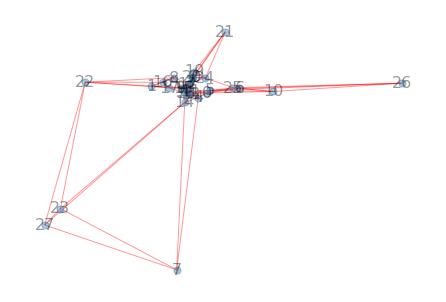

In [30]:
nx.draw(G,pos=capteurs_pos,node_size=50, alpha=0.4, edge_color="r", font_size=16, with_labels=True)

#### 2.2 Une autre modélisation :


In [49]:
#version pseudo-geodesique


G2 = nx.Graph(name = "Vélo_Nantes")
for index, row in capteurs_lite.iterrows():
    G2.add_node(index,numeros=[int(x) for x in row[0].split(',')],lat=row[1],long=row[2])

G2.nodes[0]

## table des distance
n=len(G2.nodes)
dist_table_geo=np.zeros((n,n))



for s in G2.nodes:
    for t in G2.nodes:
        dist=geodesic((G2.nodes[s]['lat'],G2.nodes[s]['long']),(G2.nodes[t]['lat'],G2.nodes[t]['long'])).km
        dist_table_geo[s,t]=dist
    
print(dist_table_geo)


#On ajoute l'arête [s,t] si il n'existe pas de sommet u tq d(s,u)+d(u,t) < 1.15 d(s,t)
for s in G2.nodes:
    for t in G2.nodes:
        if dist_table_geo[s,t]>.05 :
            add=True
            for u in G2.nodes:
                #Que fait-on ici ? Quel est l'impact du paramètre ?
                if dist_table_geo[s,u]+dist_table_geo[u,t] < 1.15* dist_table_geo[s,t] and dist_table_geo[s,u]>.05 and dist_table_geo[t,u]>.05:
                    add=False
            if add : 
                G2.add_edge(s,t,distance=dist_table_geo[s,t])


[[ 0.          3.10246218  1.63162214  1.28717319  0.65149567  0.26355049
   1.78870082 16.17558549  2.2918465   1.50061034  3.58593985  0.9503544
   1.35702457  0.92797334  1.50094506  1.35090008  2.61184077  2.11764498
   1.20994213  2.07677624  1.62118329  5.64777985  6.70515396 13.2078357
   1.36777894  1.48995014 10.58119842 14.92001907]
 [ 3.10246218  0.          2.42831272  2.12858781  2.74876089  3.20018447
   4.78308244 16.77207712  1.44415431  1.62523723  6.64086772  2.15241858
   1.98711694  2.23629891  2.33892034  1.76365616  0.70217617  0.98600469
   1.94151459  2.66900398  2.36161158  6.36609366  3.61144355 12.19603475
   3.01521081  4.45503375 13.58607667 13.9144383 ]
 [ 1.63162214  2.42831272  0.          0.58063566  1.88582699  1.51141496
   2.69830376 17.56061204  1.06500556  1.16850512  4.53288922  1.28817986
   0.67912387  1.55448825  2.35470906  1.1724352   1.7394168   1.63832271
   1.54171499  0.50182222  0.0700456   4.46550964  5.89617287 13.98367569
   0.6440837

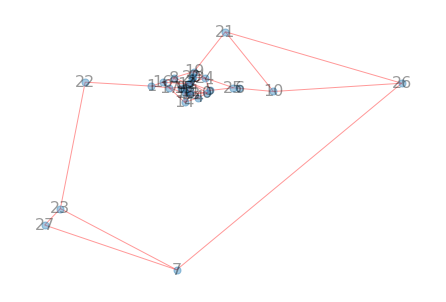

In [50]:
nx.draw(G2,pos=capteurs_pos,node_size=50, alpha=0.4, edge_color="r", font_size=16, with_labels=True)